## Project Flow

1. Data preprocessing
2. summary stats
3. EDA
4. Data visualization
5. Results

## Import Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 

## 1. Data Cleaning and Pre processing

In [3]:
#load the data
df = pd.read_csv('all_data.csv')

#print a sample of dataset
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Variables Summary:

In [4]:

#check for duplicates
df.duplicated().sum()

#check for missing data
df.isna().sum()

#display the columns datatypes
display(df.dtypes)

#Change column names to lower case
df.columns = [x.lower() for x in df.columns]

#Rename life expectancy column name for ease of use
df.rename(columns ={'life expectancy at birth (years)': 'life_expectancy'}, inplace=True)

#Rename United States of America to U.S.A

df['country'].replace('United States of America', 'USA', inplace=True)

#Check that it worked and also that the data looks as expected(No missing values)
df.info()

#Scaling down gdp to billions
df.gdp = df.gdp/1000000000

#display unique countries and years
countries = df.country.unique().tolist()
print(countries)

#display unique years
years = df.year.unique().tolist()
print(years)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


## 2 Summary Stats

In [5]:
#mean life expectancy for every country
average_life_expectancy = df.groupby('country', as_index=False).life_expectancy.mean().sort_values(by='life_expectancy', ascending=False).round(2).reset_index().drop(columns='index')
display(average_life_expectancy)

#mean GDP for every country

average_GDP = df.groupby('country',as_index=False).gdp.mean().sort_values(by='country', ascending=True).round(2).reset_index().drop(columns='index')
display(average_GDP)

#mean GDP of every country in year 2000 compared to year 2015
#average_GDP_2000 = df.groupby('country', as_index=False).gdp.mean().sort_values(by='year').reset_index().drop(columns='index')
#display(average_GDP_2000)
#average_GDP_2015 = df.groupby('country', as_index=False).gdp.mean().sort_values(by='year').reset_index().drop(columns='index')
#display(average_GDP_2015)

,country,life_expectancy
0,Germany,79.66
1,Chile,78.94
2,USA,78.06
3,Mexico,75.72
4,China,74.26
5,Zimbabwe,50.09


,country,gdp
0,Chile,169.79
1,China,4957.71
2,Germany,3094.78
3,Mexico,976.65
4,USA,14075.00
5,Zimbabwe,9.06


In [6]:
#get the interquartile range for each country
iqr_range = {}

for x in df.country:
    data = df[df['country'] == x]
    
    q1, q3 = np.percentile(data.life_expectancy,[25, 75])
    
    iqr_range[x] = round(q3 - q1, 3) 
    
display(iqr_range)

{'Chile': 1.85,
 'China': 1.85,
 'Germany': 1.575,
 'Mexico': 0.925,
 'USA': 1.3,
 'Zimbabwe': 10.15}

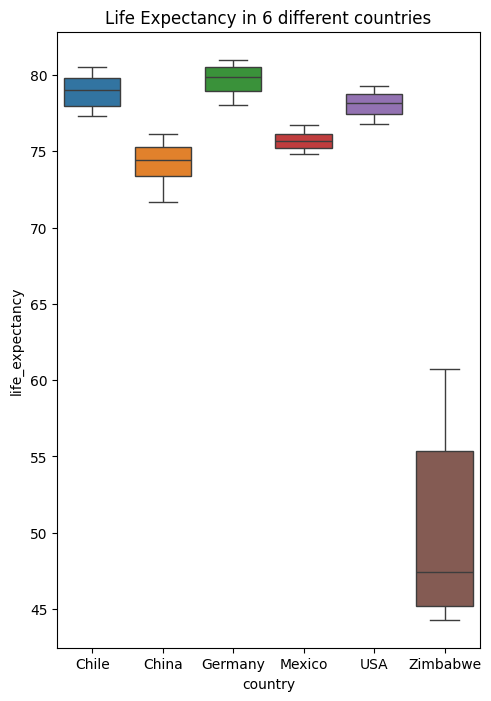

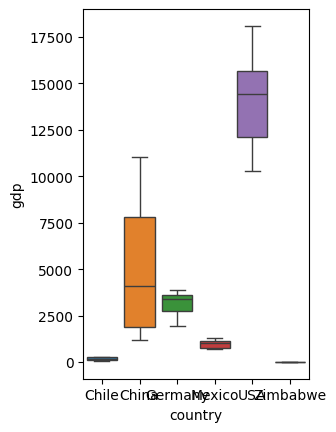

In [8]:
#plot life expectancy and GDP in 6 countries

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='country', y='life_expectancy', hue='country')
plt.xlabel('country')
plt.ylabel('life_expectancy')
plt.title('Life Expectancy in 6 different countries')
plt.show()

plt.subplot(1,2,2)
sns.boxplot(data=df,x='country', y='gdp', hue='country')
plt.show()